In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\sakir\OneDrive\Masaüstü\career\akbank\globalaihub2\data\raw\credit_card_transactions.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


Tablodaki sütunların açıklamaları :

* Unnamed: 0: Veri setindeki otomatik oluşturulmuş indeks sütunu.
* trans_date_trans_time: İşlem tarih ve saat bilgisi.
* cc_num: Kredi kartı numarası (anonimleştirilmiş).
* merchant: İşlemin yapıldığı satıcı veya işletme adı.
* category: İşlemin kategorisi (örneğin, "grocery_pos" market alışverişi gibi).
* amt: İşlem tutarı (para birimi belirtilmemiş, muhtemelen USD).
* first: Kart sahibinin adı.
* last: Kart sahibinin soyadı.
* gender: Kart sahibinin cinsiyeti (M: Erkek, F: Kadın).
* street: Kart sahibinin adresi (sokak bilgisi).
* long: Kart sahibinin adresine ait boylam bilgisi.
* city_pop: Kart sahibinin yaşadığı şehrin nüfusu.
* job: Kart sahibinin mesleği.
* dob: Kart sahibinin doğum tarihi.
* trans_num: İşlem numarası (benzersiz işlem kimliği).
* unix_time: İşlemin Unix zaman damgası.
* merch_lat: İşlemin yapıldığı satıcının enlem bilgisi.
* merch_long: İşlemin yapıldığı satıcının boylam bilgisi.
* is_fraud: İşlemin dolandırıcılık olup olmadığını belirten etiket 
(0: Dolandırıcılık değil, 1: Dolandırıcılık).
* merch_zipcode: İşlemin yapıldığı satıcının posta kodu.

In [4]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64


"Veri setinin geniş olması nedeniyle, 'merch_zipcode' sütunundaki eksik değerleri satıcının enlem (merch_lat) ve boylam (merch_long) bilgilerine göre doldurmak yerine silmeye karar verdik."


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


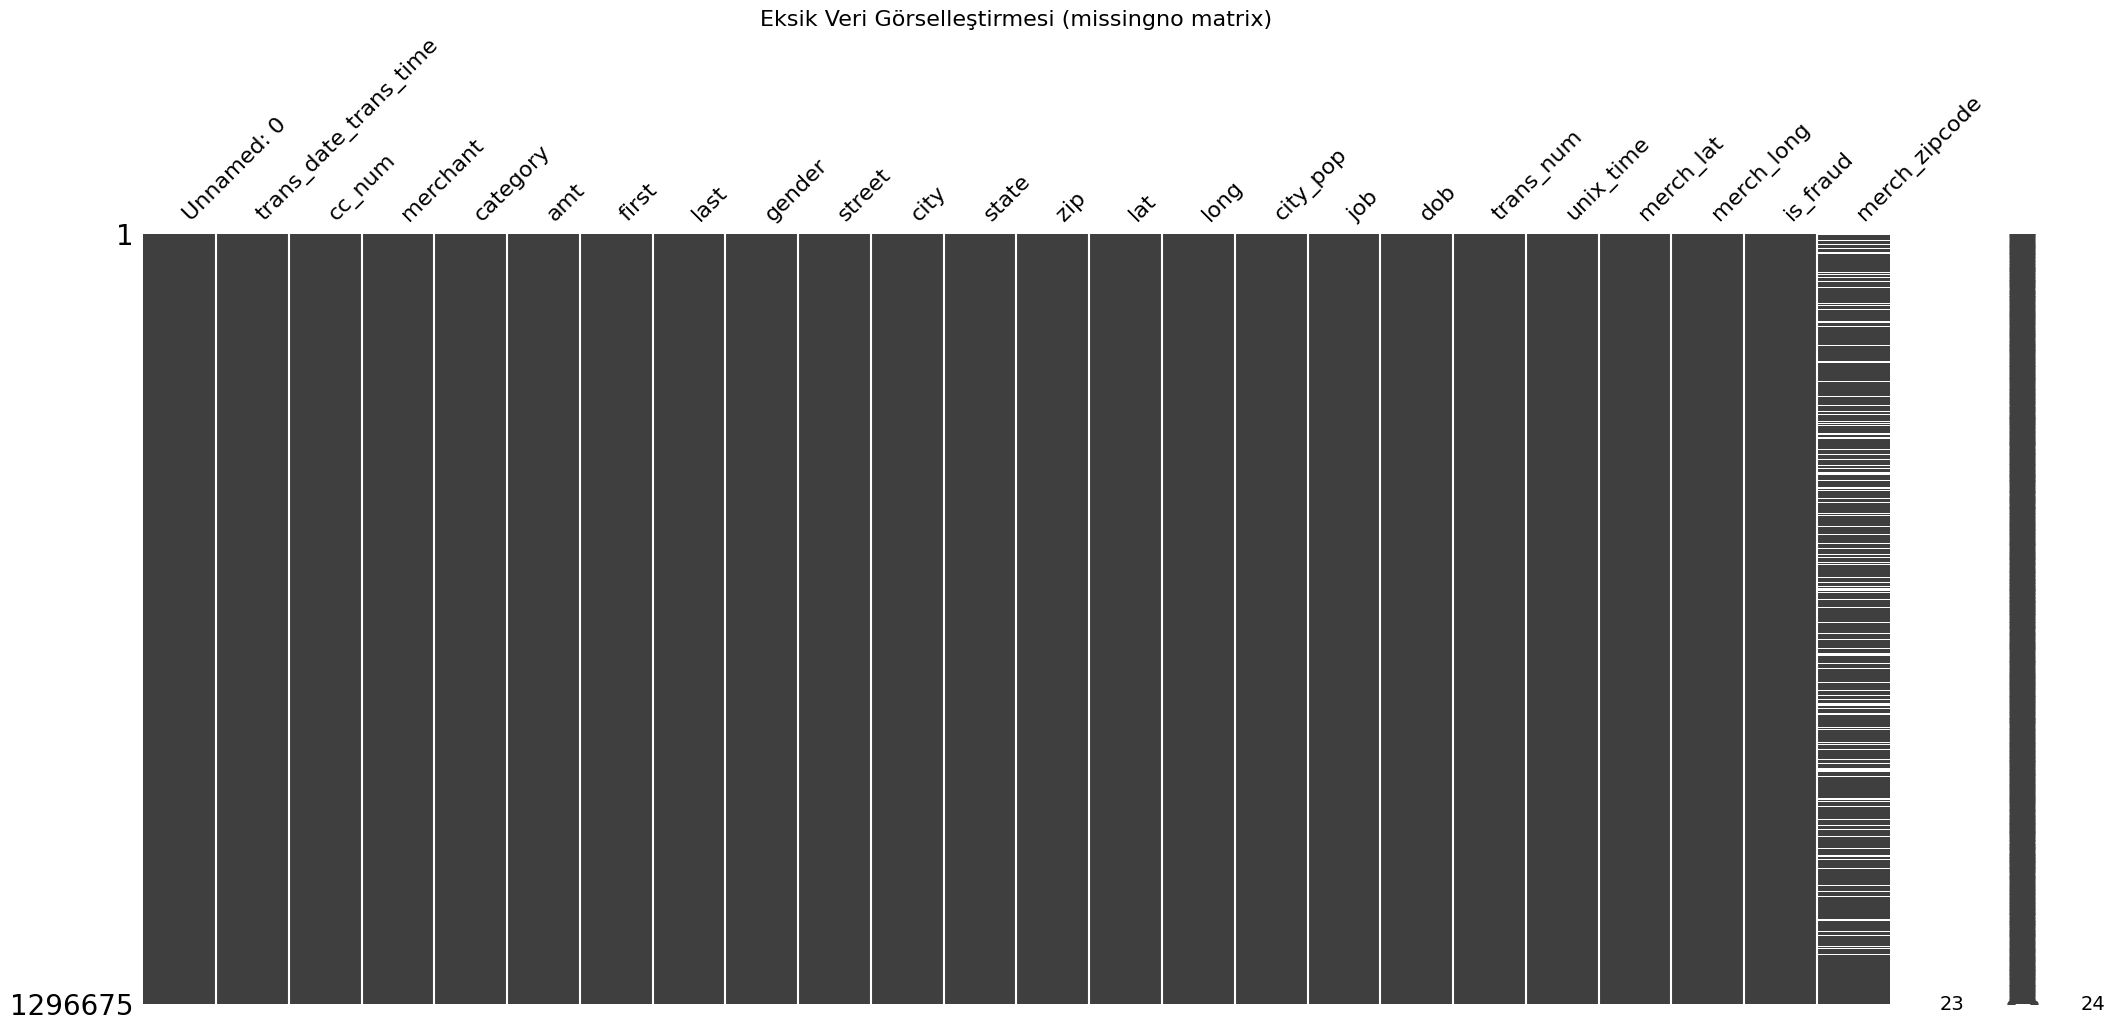

In [5]:
%pip install missingno
import missingno as msn

msn.matrix(df)
plt.title("Eksik Veri Görselleştirmesi (missingno matrix)", fontsize=16)
plt.show()

missingno kütüphanesi, veri setindeki eksik değerlerin görselleştirilmesini sağlar. msn.matrix(df) fonksiyonu ile eksik verilerin hangi sütunlarda ve ne sıklıkta bulunduğu kolayca tespit edilebilir. Bu sayede veri temizleme ve ön işleme adımlarında daha bilinçli kararlar alınabilir. Özellikle büyük veri setlerinde eksik veri desenlerini hızlıca görmek için oldukça kullanışlıdır.
 sorunları kontrol eder. Yan yana iki sütun arasında benzer boşluklar varsa veri setinde sorun vardır.

In [6]:
# clean the value of 'merch_zipcode' column
df.dropna(inplace=True)

In [7]:
# Drop the 'Unnamed: 0' column because it is not needed
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100702 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1100702 non-null  object 
 1   cc_num                 1100702 non-null  int64  
 2   merchant               1100702 non-null  object 
 3   category               1100702 non-null  object 
 4   amt                    1100702 non-null  float64
 5   first                  1100702 non-null  object 
 6   last                   1100702 non-null  object 
 7   gender                 1100702 non-null  object 
 8   street                 1100702 non-null  object 
 9   city                   1100702 non-null  object 
 10  state                  1100702 non-null  object 
 11  zip                    1100702 non-null  int64  
 12  lat                    1100702 non-null  float64
 13  long                   1100702 non-null  float64
 14  city_pop               

In [9]:
df.shape

(1100702, 23)

In [10]:
# Convert 'trans_date_trans_time' and 'dob' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Get the start and end dates
start_date = df['trans_date_trans_time'].min()
end_date = df['trans_date_trans_time'].max()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2019-01-01 00:00:18
End Date: 2020-06-21 12:13:37


Veri seti 2019 ocak ayı verileri ile 2020 haziran ayı arasındaki 1.5 yıllık verileri içermektedir.

In [11]:
df['category'].value_counts()

category
gas_transport     112473
grocery_pos       104942
home              104295
shopping_pos       98958
kids_pets          95954
shopping_net       82440
entertainment      79956
food_dining        77767
personal_care      77088
health_fitness     72849
misc_pos           67694
misc_net           53475
grocery_net        38308
travel             34503
Name: count, dtype: int64

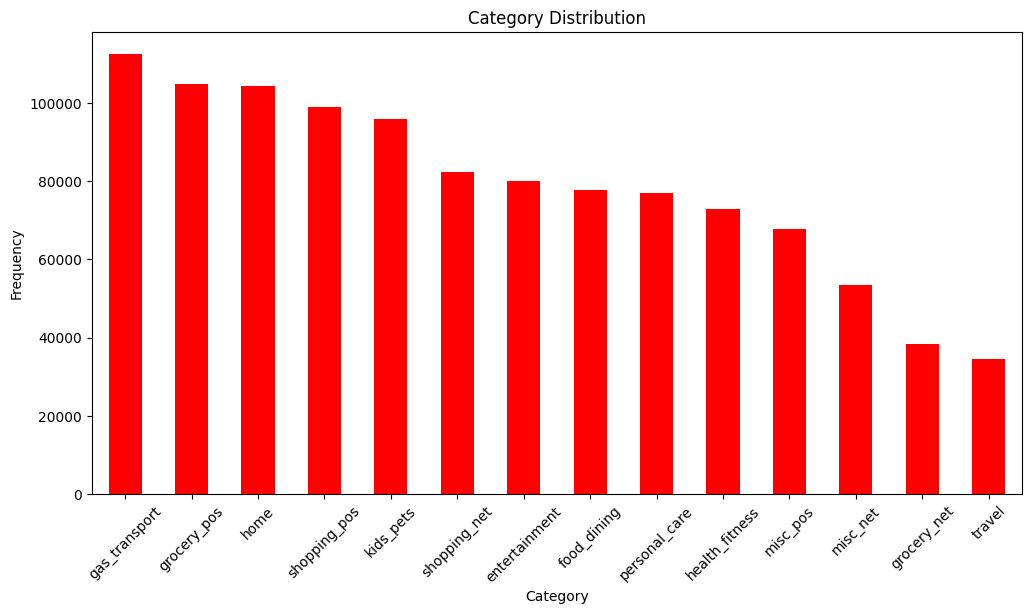

In [12]:
df['category'].value_counts().plot(kind='bar', figsize=(12, 6), color='red')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



* gas_transport: 112,473 işlemle en yüksek işlem sayısına sahiptir. Bu, ulaşım ve yakıt harcamalarının veri setinde önemli bir yer tuttuğunu gösterir.

* travel: 34,503 işlemle en az işlem yapılan kategoridir. Bu, seyahat harcamalarının diğer kategorilere göre daha az olduğunu gösterir.

* Bu grafik, kullanıcıların harcama alışkanlıklarını anlamak için faydalıdır. Örneğin: Daha az işlem yapılan kategorilerdeki anormal işlemler dolandırıcılık göstergesi olabilir.

In [13]:
df['gender'].value_counts()

gender
F    599801
M    500901
Name: count, dtype: int64

Veri setindeki gender sütununda, kadın (F) ve erkek (M) kullanıcıların dağılımı şu şekildedir:

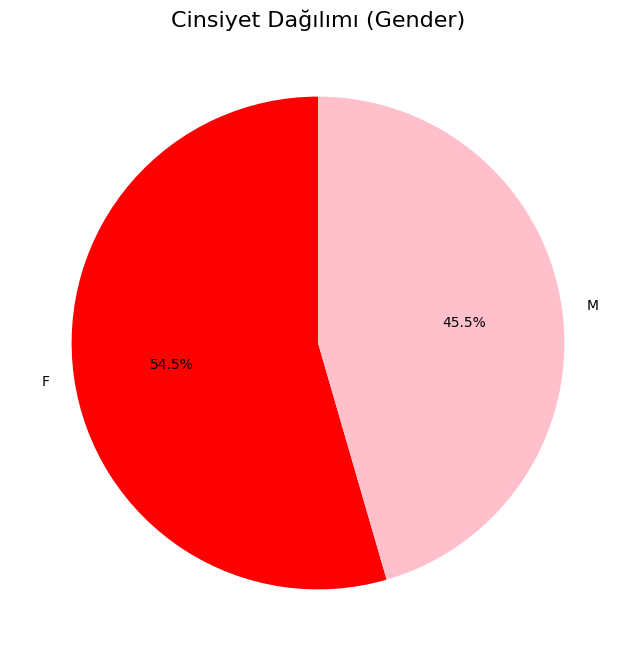

In [14]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'pink'])
plt.title("Cinsiyet Dağılımı (Gender)", fontsize=16)
plt.show()

In [15]:
df['job'].value_counts()

job
Exhibition designer           8722
Designer, ceramics/pottery    7817
Systems developer             7573
Financial adviser             7337
Naval architect               6963
                              ... 
Contracting civil engineer       7
Warehouse manager                7
Industrial buyer                 7
Forest/woodland manager          6
Accountant, chartered            6
Name: count, Length: 493, dtype: int64

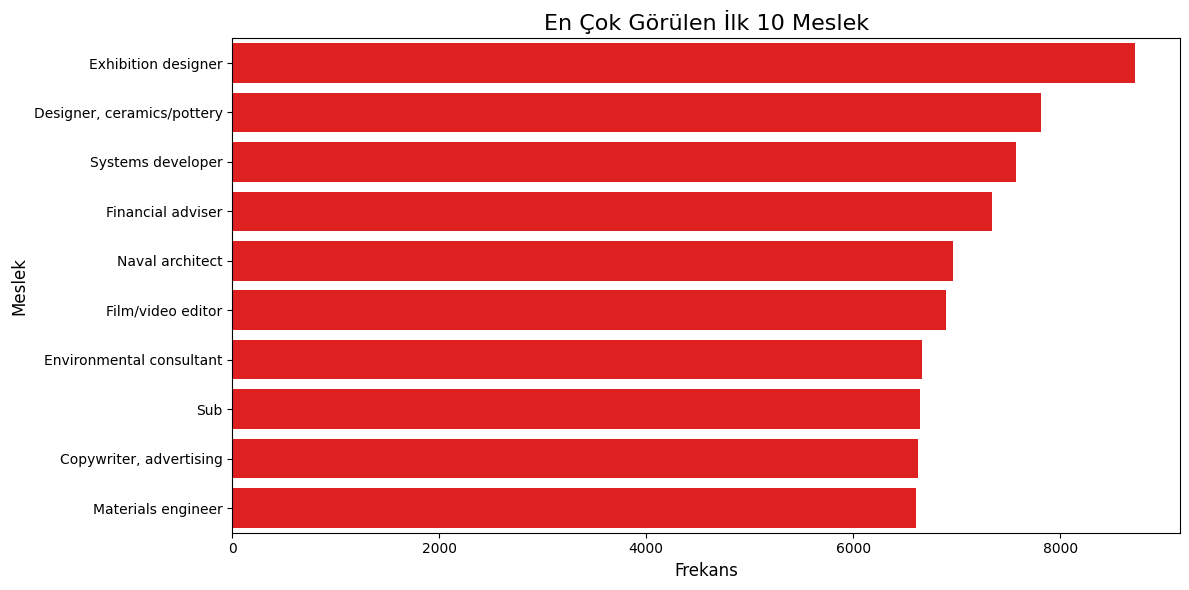

In [16]:
# İlk 10 mesleği seçme
top_10_jobs = df['job'].value_counts().head(10)

# Sütun grafiği oluşturma
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, color='red')
plt.title("En Çok Görülen İlk 10 Meslek", fontsize=16)
plt.xlabel("Frekans", fontsize=12)
plt.ylabel("Meslek", fontsize=12)
plt.tight_layout()
plt.show()

Dolandırıcılık Analizi: Daha az temsil edilen meslek gruplarındaki anormal işlemler dolandırıcılık göstergesi olabilir.

In [17]:
df['city'].value_counts()

city
Birmingham     5556
Thomas         4525
San Antonio    4488
Utica          4456
Cleveland      4251
               ... 
North East        5
Norfolk           5
Downey            4
Buellton          4
Las Vegas         4
Name: count, Length: 891, dtype: int64

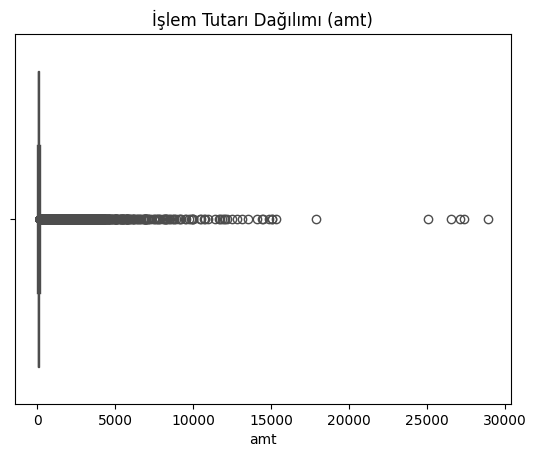

In [18]:
sns.boxplot(data=df, x='amt', color='red')
plt.title("İşlem Tutarı Dağılımı (amt)")
plt.show()

amt (İşlem Tutarı)

Neden? İşlem tutarlarının dağılımını ve aykırı değerleri görmek için uygundur. Örneğin, çok yüksek işlem tutarları dolandırıcılık göstergesi olabilir.

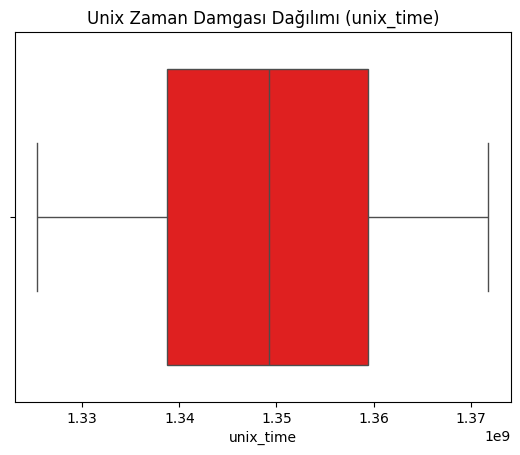

In [19]:
sns.boxplot(data=df, x='unix_time', color='red')
plt.title("Unix Zaman Damgası Dağılımı (unix_time)")
plt.show()

unix_time (Unix Zaman Damgası)

Neden? İşlemlerin zaman dağılımını analiz etmek için kullanılabilir. Özellikle zaman bazlı anormallikleri tespit etmek için faydalıdır.

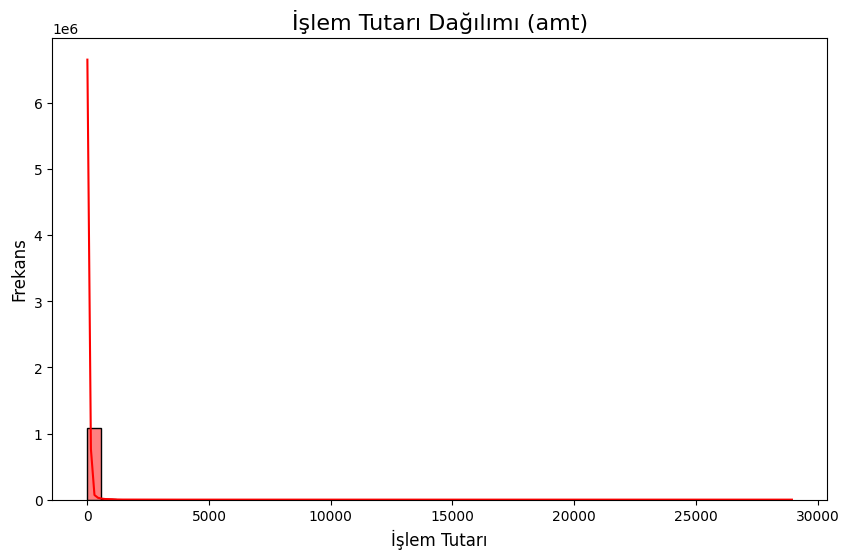

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True, color='red')
plt.title("İşlem Tutarı Dağılımı (amt)", fontsize=16)
plt.xlabel("İşlem Tutarı", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.show()

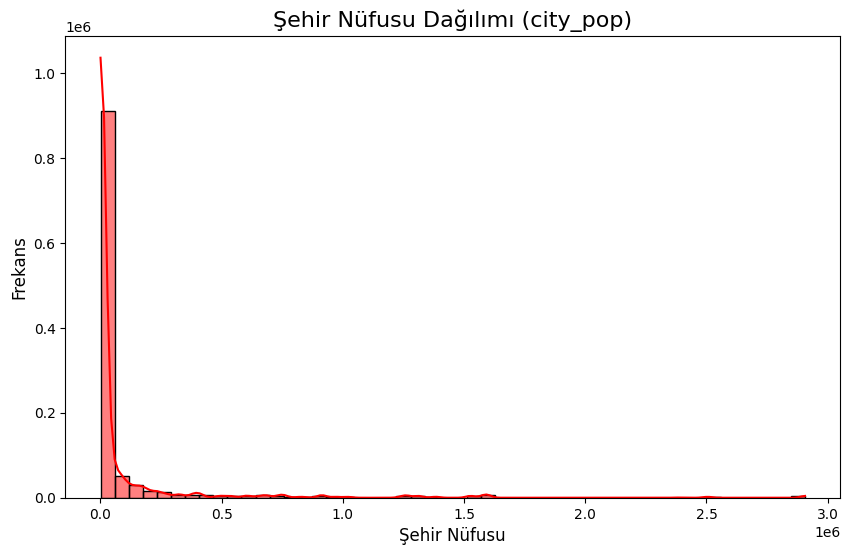

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['city_pop'], bins=50, kde=True, color='red')
plt.title("Şehir Nüfusu Dağılımı (city_pop)", fontsize=16)
plt.xlabel("Şehir Nüfusu", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.show()

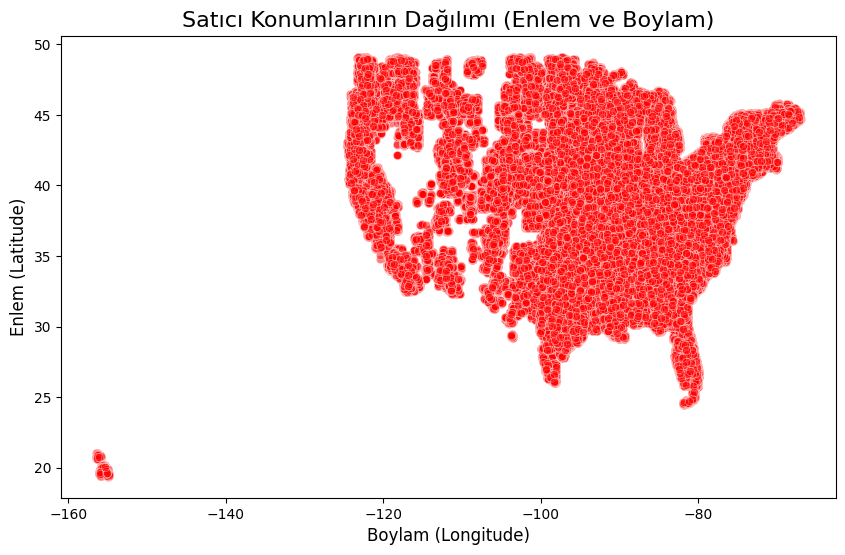

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='merch_long', y='merch_lat', alpha=0.5, color='red')
plt.title("Satıcı Konumlarının Dağılımı (Enlem ve Boylam)", fontsize=16)
plt.xlabel("Boylam (Longitude)", fontsize=12)
plt.ylabel("Enlem (Latitude)", fontsize=12)
plt.show()

Coğrafi verilerin dağılımını analiz etmek için kullanılabilir. Örneğin, işlemlerin yoğunlaştığı bölgeleri görebilirsiniz.

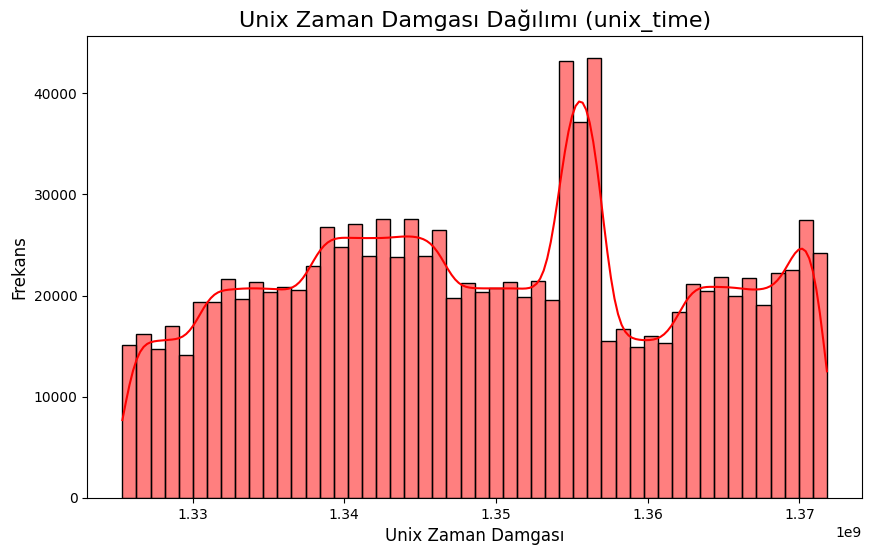

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['unix_time'], bins=50, kde=True, color='red')
plt.title("Unix Zaman Damgası Dağılımı (unix_time)", fontsize=16)
plt.xlabel("Unix Zaman Damgası", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.show()

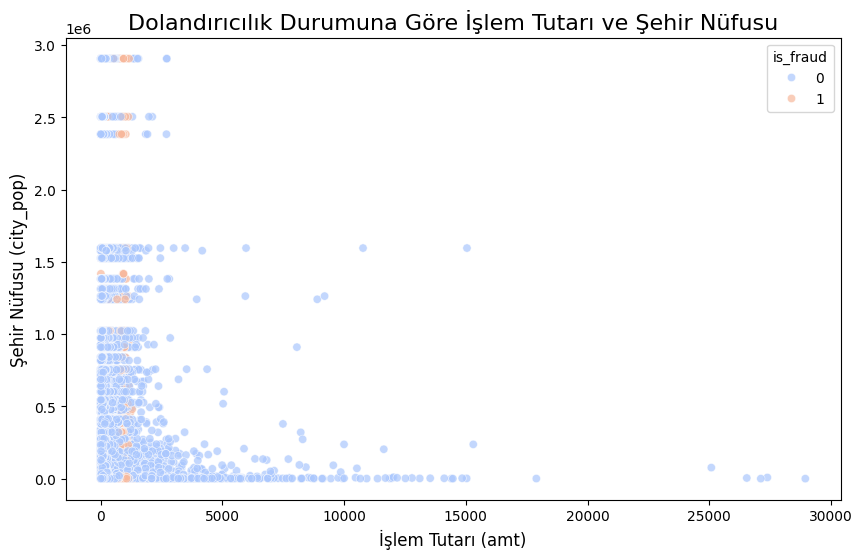

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amt', y='city_pop', hue='is_fraud', alpha=0.7, palette='coolwarm')
plt.title("Dolandırıcılık Durumuna Göre İşlem Tutarı ve Şehir Nüfusu", fontsize=16)
plt.xlabel("İşlem Tutarı (amt)", fontsize=12)
plt.ylabel("Şehir Nüfusu (city_pop)", fontsize=12)
plt.show()

Grafikte, dolandırıcılık durumu (is_fraud) ile işlem tutarı (amt) ve şehir nüfusu (city_pop) arasındaki ilişki görselleştirilmiştir.

Yorumlar:
Dolandırıcılık Durumu (is_fraud):

Mavi Noktalar (0): Dolandırıcılık olmayan işlemleri temsil eder.
Turuncu Noktalar (1): Dolandırıcılık olan işlemleri temsil eder.
İşlem Tutarı (amt):

Dolandırıcılık işlemleri genellikle daha yüksek işlem tutarlarında yoğunlaşmıştır.
Düşük işlem tutarlarında dolandırıcılık işlemleri daha az görülmektedir.
Şehir Nüfusu (city_pop):

Dolandırıcılık işlemleri, hem düşük nüfuslu hem de yüksek nüfuslu şehirlerde gerçekleşmiştir.
Ancak, düşük nüfuslu şehirlerde dolandırıcılık işlemleri daha fazla yoğunlaşmış gibi görünüyor.
Genel Dağılım:

Çoğu işlem düşük işlem tutarlarında ve düşük şehir nüfuslarında yoğunlaşmıştır.
Yüksek işlem tutarları ve yüksek şehir nüfuslarında daha az işlem bulunmaktadır.
Sonuç:
Dolandırıcılık Analizi: Yüksek işlem tutarları ve düşük şehir nüfuslarında dolandırıcılık riski daha yüksek olabilir.
Öneri: Dolandırıcılık tespiti için işlem tutarı ve şehir nüfusu gibi özellikler, makine öğrenimi modellerinde önemli birer değişken olarak kullanılabilir.


In [25]:
# Saatlik dolandırıcılık dağılımı (çizgi grafiği)
hourly_fraud = df[df['is_fraud'] == 1]['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_fraud.index, hourly_fraud.values, marker='o', color='red')
plt.title("Saatlik Dolandırıcılık Dağılımı (Çizgi Grafiği)", fontsize=16)
plt.xlabel("Saat", fontsize=12)
plt.ylabel("Dolandırıcılık Sayısı", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


KeyError: 'hour'

Dolandırıcılık işlemleri günün büyük bir kısmında düşük seviyede kalırken, gece saatlerinde (özellikle 22:00 civarında) ani bir artış göstermektedir.
Bu durum, dolandırıcılık işlemlerinin belirli saatlerde yoğunlaştığını ve zaman bazlı analizlerin dolandırıcılık tespiti için önemli bir faktör olabileceğini göstermektedir.


C:\Users\sakir\AppData\Local\Temp\ipykernel_23612\871049253.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_fraud.index, y=gender_fraud.values, palette='coolwarm')


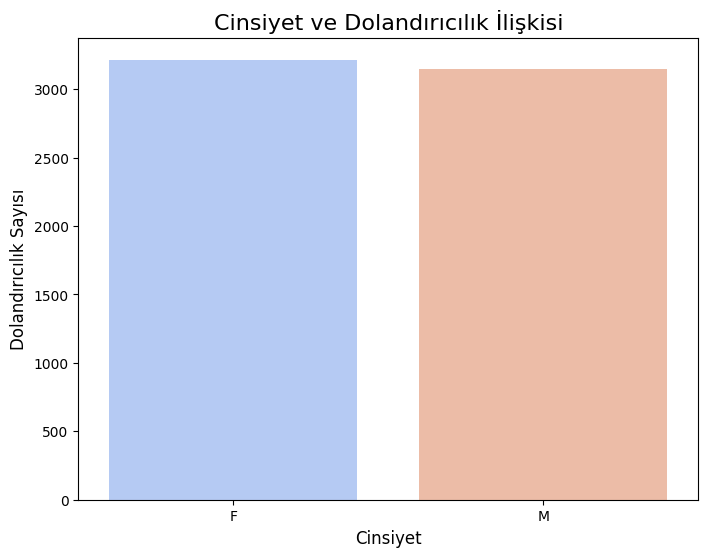

In [ ]:
# Cinsiyet ve dolandırıcılık ilişkisi
gender_fraud = df.groupby('gender')['is_fraud'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_fraud.index, y=gender_fraud.values, palette='coolwarm')
plt.title("Cinsiyet ve Dolandırıcılık İlişkisi", fontsize=16)
plt.xlabel("Cinsiyet", fontsize=12)
plt.ylabel("Dolandırıcılık Sayısı", fontsize=12)
plt.show()

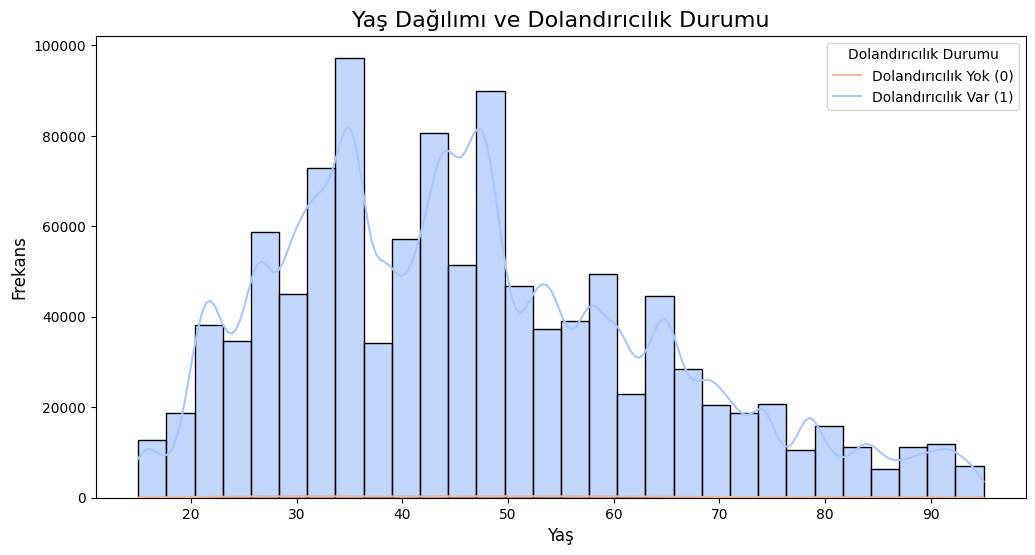

In [ ]:
# Calculate age from the 'dob' column
end_date = df['trans_date_trans_time'].max()
df['age'] = (end_date - df['dob']).dt.days // 365

# Compare age distribution based on 'is_fraud'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='is_fraud', bins=30, kde=True, palette='coolwarm', alpha=0.7)
plt.title("Yaş Dağılımı ve Dolandırıcılık Durumu", fontsize=16)
plt.xlabel("Yaş", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.legend(title="Dolandırıcılık Durumu", labels=["Dolandırıcılık Yok (0)", "Dolandırıcılık Var (1)"])
plt.show()

30-50 yaş aralığı, dolandırıcılık işlemleri açısından daha dikkat çekici olabilir.

In [ ]:
columns_to_describe = ['amt', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
df[columns_to_describe].describe()

,amt,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.100702e+06,1.100702e+06,1.100702e+06,1.100702e+06,1.100702e+06,1.100702e+06
mean,7.024263e+01,8.718006e+04,1.349246e+09,3.854538e+01,-8.881376e+01,5.780856e-03
std,1.614206e+02,2.986316e+05,1.284034e+07,4.577577e+00,1.228787e+01,7.581189e-02
min,1.000000e+00,2.300000e+01,1.325376e+09,1.935247e+01,-1.564877e+02,0.000000e+00
25%,9.640000e+00,7.760000e+02,1.338753e+09,3.506480e+01,-9.538574e+01,0.000000e+00
50%,4.754000e+01,2.456000e+03,1.349254e+09,3.931189e+01,-8.669550e+01,0.000000e+00
75%,8.316000e+01,1.876000e+04,1.359397e+09,4.167489e+01,-7.987686e+01,0.000000e+00
max,2.894890e+04,2.906700e+06,1.371817e+09,4.912822e+01,-6.695600e+01,1.000000e+00


Aykırı Değerler:

amt ve city_pop sütunlarında büyük aykırı değerler mevcut. Bu değerler, dolandırıcılık tespiti için önemli olabilir.
Çarpıklık:

amt ve city_pop sütunlarının dağılımı çarpık. Normalizasyon veya log dönüşümü gibi yöntemler kullanılabilir.
Dengesiz Veri:

is_fraud sütununda dolandırıcılık işlemleri çok az. Bu, dengesiz veri seti sorunlarına yol açabilir ve modelleme sırasında dikkate alınmalıdır.
Coğrafi Dağılım:

merch_lat ve merch_long sütunları, işlemlerin coğrafi yoğunluğunu analiz etmek için kullanılabilir.
Zaman Analizi:

unix_time sütunu, işlemlerin zaman bazlı yoğunluğunu ve anormalliklerini analiz etmek için kullanılabilir.

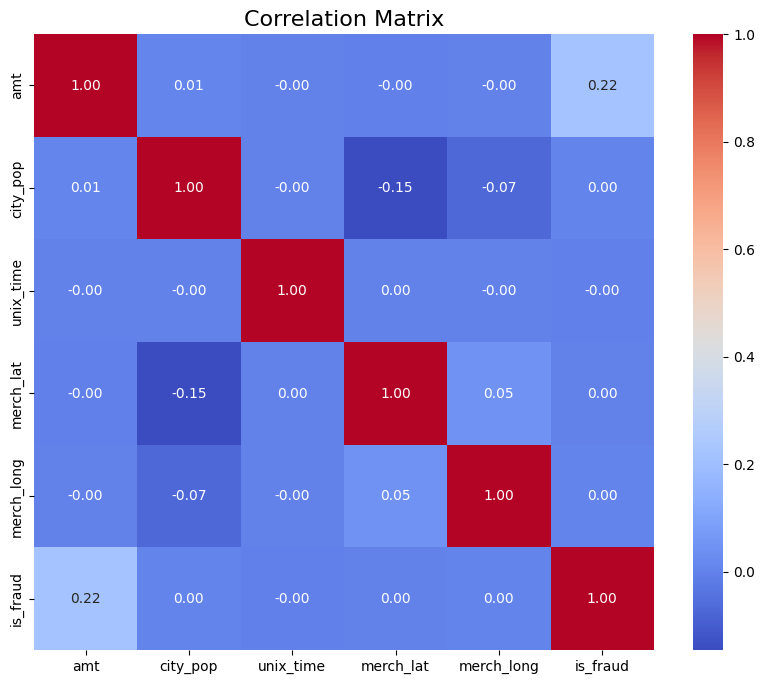

In [ ]:
# corelation matrix
correlation_matrix = df[columns_to_describe].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [ ]:
df['is_fraud'].value_counts()

is_fraud
0    1094339
1       6363
Name: count, dtype: int64

Hangi Yöntem Daha Mantıklı?
amt ve city_pop:

Bu sütunlar çarpık dağılıma sahip ve büyük aykırı değerler içeriyor.
Log dönüşümü veya normalizasyon bu sütunlar için daha mantıklı.
Eğer aykırı değerlerin etkisini azaltmak istiyorsanız, log dönüşümü tercih edilebilir.
unix_time:

Zaman damgası olduğu için standartlaştırma veya normalizasyon uygundur.
Zaman bazlı analizlerde ölçeklendirme önemlidir.
merch_lat ve merch_long:

Coğrafi veriler genelde belirli bir aralıkta olduğu için standartlaştırma daha uygundur.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100702 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1100702 non-null  datetime64[ns]
 1   cc_num                 1100702 non-null  int64         
 2   merchant               1100702 non-null  object        
 3   category               1100702 non-null  object        
 4   amt                    1100702 non-null  float64       
 5   first                  1100702 non-null  object        
 6   last                   1100702 non-null  object        
 7   gender                 1100702 non-null  object        
 8   street                 1100702 non-null  object        
 9   city                   1100702 non-null  object        
 10  state                  1100702 non-null  object        
 11  zip                    1100702 non-null  int64         
 12  lat                    1100702 no

In [ ]:
df.to_csv(r'C:\Users\sakir\OneDrive\Masaüstü\career\akbank\globalaihub2\fraud_detection.csv', index=False)